In [13]:
import geopandas as gpd
import pandas as pd
from os import listdir
from shapely.geometry import Polygon

In [14]:
liste_files = listdir('carreaux/')

In [15]:
temp = []
for file in liste_files:
    temp.append(pd.read_csv('carreaux/'+ file))

In [16]:
temp = pd.concat(temp).groupby(['x', 'y', 'CODE_CS'], as_index=False).surface.mean()

In [17]:
temp.surface = temp.surface / 1000**2 * 100

In [18]:
carreaux = temp.pivot(values='surface', index=['x', 'y'], columns='CODE_CS').reset_index().fillna(0)

In [19]:
geometry = [Polygon([(x,y),(x+1000,y),(x+1000,y+1000),(x,y+1000),(x,y) ]) for x,y in zip(carreaux.x, carreaux.y)]

In [20]:
carreaux = gpd.GeoDataFrame(carreaux, geometry=geometry, crs=3035)

In [21]:
carreaux.head()

CODE_CS,x,y,CS1.1.1.1,CS1.1.1.2,CS1.1.2.1,CS1.1.2.2,CS1.2.1,CS1.2.2,CS1.2.3,CS2.1.1.1,CS2.1.1.2,CS2.1.1.3,CS2.1.2,CS2.1.3,CS2.2.1,geometry
0,96000,6843000,0.0,0.0,0.0,0.0,0.0,5.874368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((96000 6843000, 97000 6843000, 97000 ..."
1,96000,6844000,0.0,0.0,0.0,0.0,0.0,18.528117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((96000 6844000, 97000 6844000, 97000 ..."
2,96000,6845000,0.0,0.0,0.0,0.0,0.0,23.290165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((96000 6845000, 97000 6845000, 97000 ..."
3,96000,6846000,0.0,0.0,0.0,0.0,0.0,28.052214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((96000 6846000, 97000 6846000, 97000 ..."
4,96000,6847000,0.0,0.0,0.0,0.0,0.0,32.814222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((96000 6847000, 97000 6847000, 97000 ..."


In [22]:
carreaux['CS1.1'] = carreaux['CS1.1.1.1'] + carreaux['CS1.1.1.2'] + carreaux['CS1.1.2.1'] + carreaux['CS1.1.2.2']
carreaux['CS1.2'] = carreaux['CS1.2.1'] + carreaux['CS1.2.2'] + carreaux['CS1.2.3']
carreaux['CS2.1'] = carreaux['CS2.1.1.1'] + carreaux['CS2.1.1.2'] + carreaux['CS2.1.1.3'] + carreaux['CS2.1.2'] + carreaux['CS2.1.3']
carreaux['CS2.2'] = carreaux['CS2.2.1'] #+ carreaux['CS2.2.2']

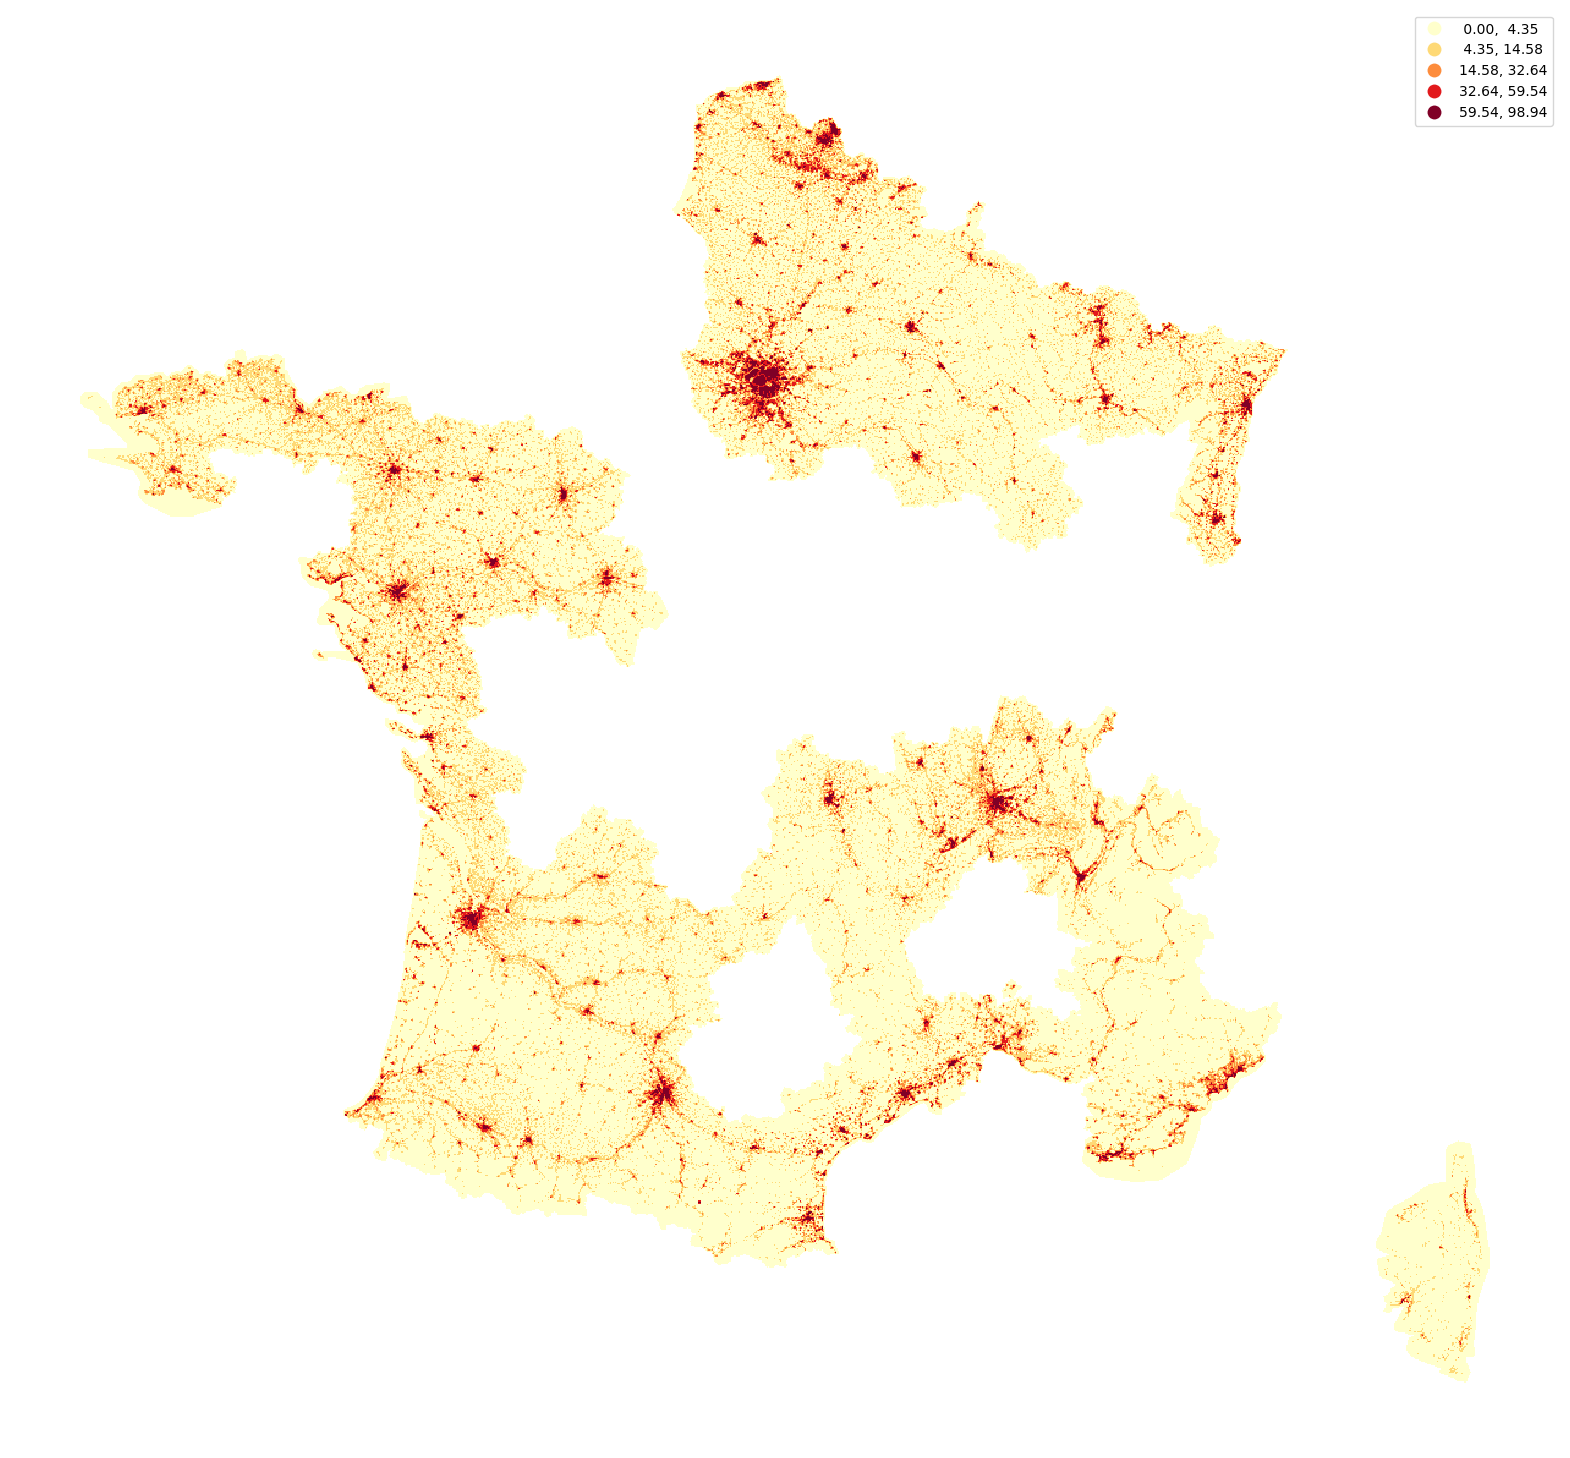

In [25]:
ax = carreaux.plot('CS1.1', cmap='YlOrRd',  scheme='fisher_jenks_sampled' , figsize=(20,20), legend=True)
ax.set_axis_off()